In [1]:


# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load data
rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")

# Clean data
rf["date"] = pd.to_datetime(rf["date"])
rf["skills_list"] = rf["skills_list"].apply(
    lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills
)

stat = rf[rf["job_title"]== "Statistician"].copy()
# let's now drop nan missing values for it
stat.dropna(subset=["mean_salary"], inplace=True)


<Axes: >

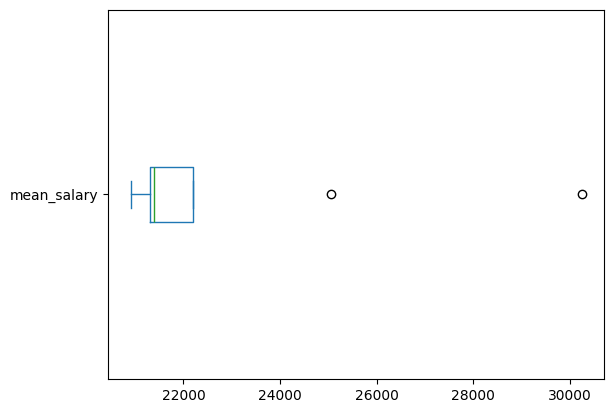

In [2]:
"""using box plot you can place a few histograms in one figure"""

# stat["mean_salary"].plot(kind="box")
"""let's now make it horizontal"""

stat["mean_salary"].plot(kind="box", vert=False)

A percentile is a measure used in statistics to indicate the relative standing of a value within a dataset. It shows how a specific value compares to the rest of the data.
The p-th percentile is the value below which p% of the data falls

If your salary is at the 90th percentile, that means:

90% of people earn less than you

You're in the top 10%.

25th percentile (Q1): Lower quartile — 25% of data is below this point.

50th percentile (Q2): Median — half of the data is below.

75th percentile (Q3): Upper quartile — 75% of data is below

/var/folders/yw/g9rc194541g7r9n119w4bljr0000gn/T/ipykernel_8225/2138737732.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,labels=list_titles,vert=False)


[3     21386.0
 4     20911.0
 5     21293.0
 6     30249.0
 7     22205.0
 8     25046.0
 14    21314.0
 21    21386.0
 24    21315.0
 Name: mean_salary, dtype: float64,
 1     23620.0
 2     23128.0
 13    21561.0
 17    19093.0
 18    19667.0
 19    18486.0
 25    20911.0
 Name: mean_salary, dtype: float64,
 0     48922.0
 9     22361.0
 10    19203.0
 15    21379.0
 16    21549.0
 20    48922.0
 22    21379.0
 Name: mean_salary, dtype: float64]

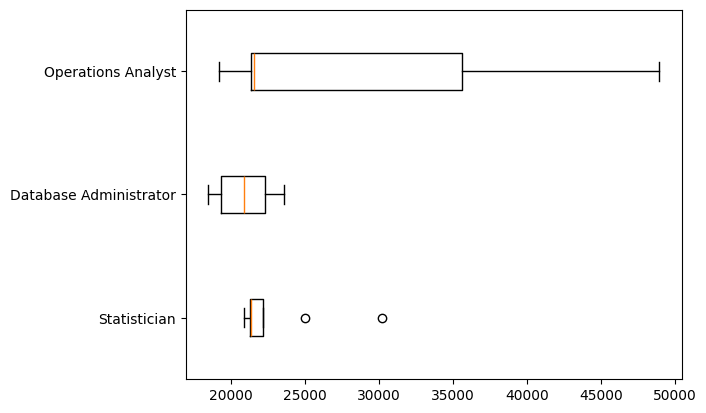

In [5]:
list_titles = ["Statistician","Database Administrator","Operations Analyst"]
overall1 = rf.copy()
overall1.dropna(subset="mean_salary", inplace=True)
overall1["mean_salary"]

job_list = [overall1[overall1["job_title"] == x]["mean_salary"] for x in list_titles]
job_list
plt.boxplot(job_list,labels=list_titles,vert=False)
job_list


['Database Administrator', 'Operations Analyst', 'Statistician']


/var/folders/yw/g9rc194541g7r9n119w4bljr0000gn/T/ipykernel_8225/798194774.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(salary_data, labels=labels, vert=False)


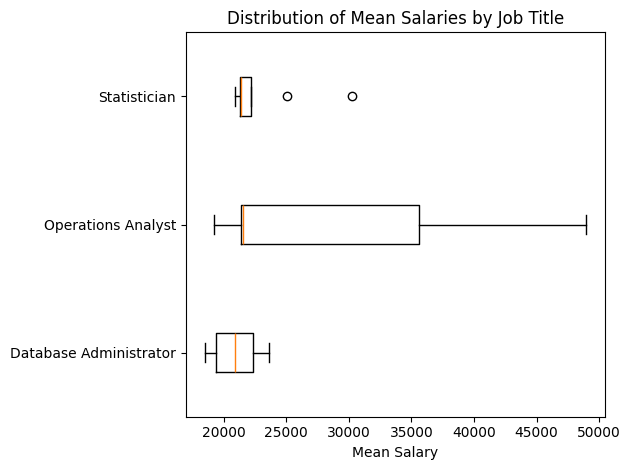

['Database Administrator', 'Operations Analyst', 'Statistician']

In [7]:
# Group salaries by each job_title
grouped = overall1.groupby("job_title")["mean_salary"]
grouped

# Create list of salary Series for each job title
salary_data = [group for name, group in grouped]

# Create list of job titles (these are the labels)
labels = [name for name, group in grouped]
print(labels)

plt.boxplot(salary_data, labels=labels, vert=False)
plt.xlabel("Mean Salary")
plt.title("Distribution of Mean Salaries by Job Title")
plt.tight_layout()
plt.show()
salary_data 
labels 